<a href="https://colab.research.google.com/github/Ashwinkpv/DSA-assignment/blob/main/insurance_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
df=files.upload()

Saving insurance.csv to insurance (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv('insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['region']=le.fit_transform(df['region'])
df['smoker']=le.fit_transform(df['smoker'])

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##KMeans

In [ ]:
from sklearn.cluster import KMeans
wss=[]
for k in range(1,15):
  model=KMeans(n_clusters=k,init='k-means++',random_state=0)
  model.fit(df)
  wss.append(model.inertia_)

In [ ]:
wss

[196074539341.69006,
 48015233363.63154,
 23009037672.717255,
 12124928462.89136,
 8541704908.518507,
 6167162762.819076,
 4434721647.703516,
 3498317073.749758,
 2783775275.495838,
 2254347592.4899497,
 1840574450.2525053,
 1497179911.3089108,
 1277092904.312837,
 1083394808.5811493]

<function matplotlib.pyplot.show>

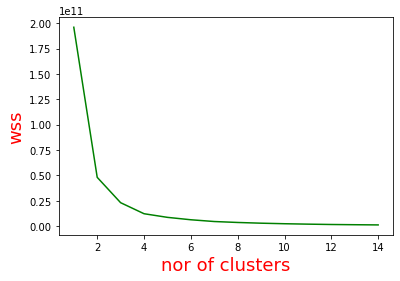

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),wss,C='g')
plt.xlabel('nor of clusters',fontsize=18,C='r')
plt.ylabel('wss',fontsize=18,C='r')
plt.show

In [ ]:
k=4

In [ ]:
model=KMeans(n_clusters=k,init='k-means++')

In [ ]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
pred=model.predict(df)
pred

array([3, 0, 0, ..., 0, 0, 1], dtype=int32)

##Hierarchial

In [ ]:
from scipy.cluster import hierarchy
x=hierarchy.linkage(df,method='ward')

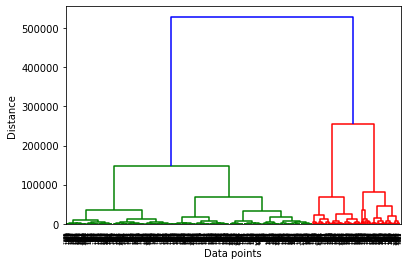

In [ ]:
import matplotlib.pyplot as plt
den=hierarchy.dendrogram(x)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [ ]:
k=2

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=k)
pred=model.fit_predict(x)

In [ ]:
pred

array([0, 0, 0, ..., 0, 0, 1])

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=6,min_samples=3)

In [ ]:
model.fit(df)

DBSCAN(algorithm='auto', eps=6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [ ]:
m=set(model.labels_)

In [ ]:
m

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49}

In [ ]:
k=len(m)

In [ ]:
k

51

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=k)

In [ ]:
pred=model.fit_predict(df)
pred

array([ 5,  1, 39, ...,  1, 38,  0])